In [1]:
from email.contentmanager import raw_data_manager
from pydoc import classname
import numpy as np
import pandas as pd

filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values

cols = range(0, 13)

X = raw_data[:, cols]

attribute_names = np.asarray(df.columns[cols])
attribute_dic = dict(zip(attribute_names, range(len(attribute_names))))

# Our class labels is DEATH 
classLabels = raw_data[:, -1]
classNames = sorted(set(classLabels))
classDic = dict(zip(classNames, range(len(classNames))))
y = np.array([classDic[i] for i in classLabels])

N, M = X.shape
C = len(classNames)



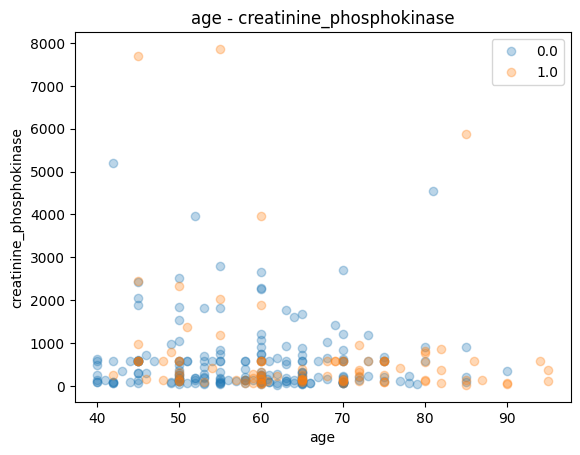

In [8]:
from re import A
import matplotlib.pyplot as plt
A= "age"
B= "creatinine_phosphokinase"
i = attribute_dic[A]
j = attribute_dic[B]

f = plt.figure()
plt.title(A + ' - ' + B)

for c in range(C):
    class_mask = y==c
    plt.plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()






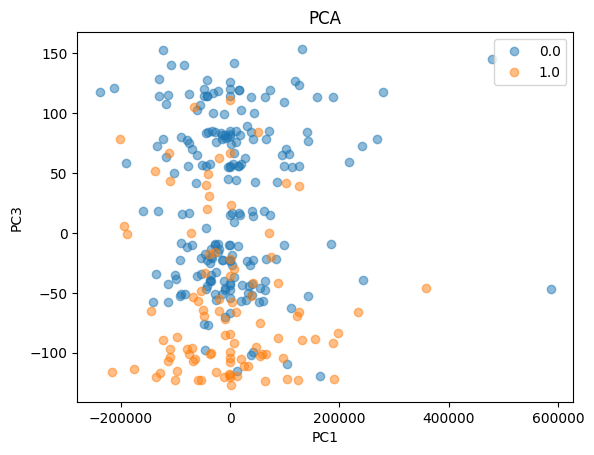

In [10]:
from scipy.linalg import svd

#Substract mean value from data matrix
Y = X - np.ones((N, 1)) * X.mean(0)

U,S,V = svd(Y, full_matrices= False)

V = V.T

Z = Y @ V

# Plot PCA of the data
f = plt.figure()
plt.title('PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
plt.legend(classNames)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))

# Output result to screen
plt.show()